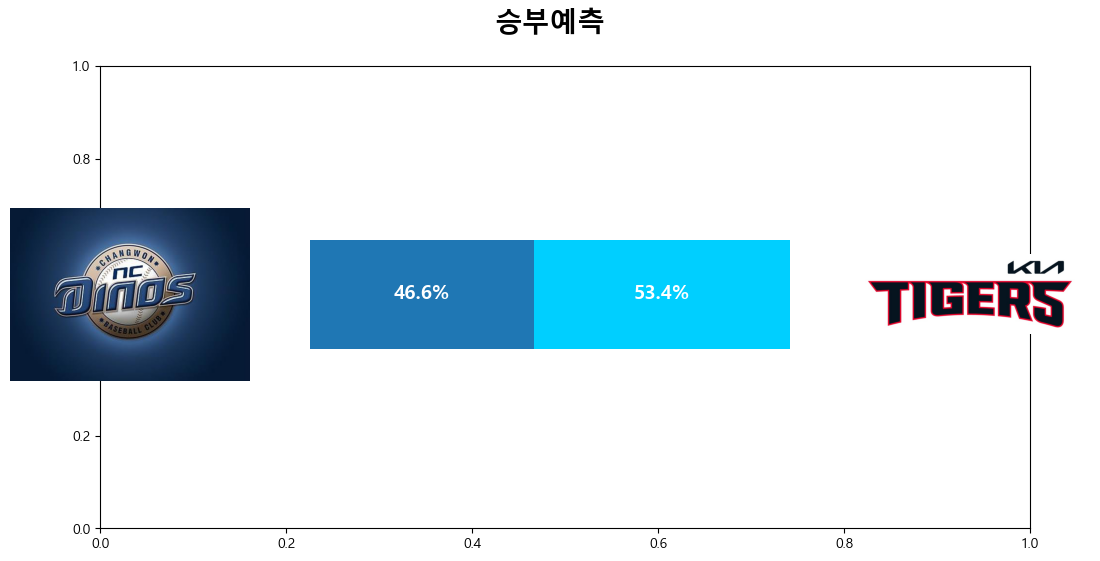

In [36]:
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_prop)

# 이미지 로드
left_img = Image.open("../../jpg/st_team_nc.jpg")
right_img = Image.open("../../jpg/kia.jpg")

# 데이터
nc_rate = 46.6
kia_rate = 53.4



# 전체 그림
fig = plt.figure(figsize=(12, 6))
# fig.patch.set_facecolor('#007bff')  # 배경

# 제목
plt.text(0.5, 0.95, "승부예측", ha='center', va='center',
         fontsize=20, color='black', weight='bold', transform=fig.transFigure)

# 왼쪽 이미지
ax_img_left = fig.add_axes([0.05, 0.25, 0.2, 0.5])
ax_img_left.imshow(left_img)
ax_img_left.axis('off')

# 오른쪽 이미지
ax_img_right = fig.add_axes([0.75, 0.25, 0.2, 0.5])
ax_img_right.imshow(right_img)
ax_img_right.axis('off')

# 중앙 그래프

ax_bar = fig.add_axes([0.3, 0.4, 0.4, 0.2])
ax_bar.barh(0, nc_rate, color='#1f77b4', height=0.6)
ax_bar.barh(0, kia_rate, left=nc_rate, color='#00cfff', height=0.6)

# 승률 텍스트
ax_bar.text(nc_rate / 2, 0, f"{nc_rate}%", va='center', ha='center', color='white', fontsize=14, weight='bold')
ax_bar.text(nc_rate + kia_rate / 2, 0, f"{kia_rate}%", va='center', ha='center', color='white', fontsize=14, weight='bold')

# 중앙 상단 텍스트
ax_bar.text(50, 0.7, "승리 확률", ha='center', va='center', color='white', fontsize=13, weight='bold')

# 축과 눈금 완전 제거
ax_bar.axis('off')
ax_bar.set_xticks([])
ax_bar.set_yticks([])
for spine in ax_bar.spines.values():
    spine.set_visible(False)

ax_bar.set_xlim(0, 100)

plt.show()




In [30]:
import pandas as pd

import matplotlib.pyplot as plt


# CSV 파일을 데이터프레임으로 읽기
winrate_df = pd.read_csv('../../csv/winrate.csv')

# 승률 데이터 가져오기
home_rate = winrate_df.loc[winrate_df['home_winrate']].values[0]
away_rate = winrate_df.loc[winrate_df['away_winrate']].values[0]

# home_winrate와 away_winrate를 백분율로 변환
winrate_df['home_winrate'] = winrate_df['home_winrate'] * 100
winrate_df['away_winrate'] = winrate_df['away_winrate'] * 100

# 색상 설정
nc_color = '#1f77b4'   # 진한 파랑
kia_color = '#00cfff'  # 밝은 하늘

fig, ax = plt.subplots(figsize=(10, 2))
# fig.patch.set_facecolor('#007bff')  # 전체

# 막대 그래프 그리기 (왼쪽부터 누적해서 그리기)
ax.barh(0, nc_rate, color=nc_color, edgecolor='white', height=0.6)
ax.barh(0, kia_rate, left=nc_rate, color=kia_color, edgecolor='white', height=0.6)

# 텍스트 - 퍼센트
ax.text(nc_rate / 2, 0, f"{nc_rate}%", va='center', ha='center', color='white', fontsize=14, fontweight='bold')
ax.text(nc_rate + kia_rate / 2, 0, f"{kia_rate}%", va='center', ha='center', color='white', fontsize=14, fontweight='bold')

# 중앙 제목
ax.text(50, 0.6, "승리 확률", ha='center', va='center', color='black', fontsize=13, fontweight='bold')

# 축 제거
ax.axis('off')
ax.set_xlim(0, 100)

plt.tight_layout()
plt.show()


KeyError: "None of [Index([0.4897999999999999,            0.51665, 0.4328000000000001,\n                  0.45755,             0.5011,            0.51905,\n                   0.4535,            0.54405, 0.4237000000000001,\n                  0.49645],\n      dtype='float64')] are in the [index]"